# Introduction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# On commence par fixer la seed pour la reproductibilité des résultats
np.random.seed(31415)

In [ ]:
from sklearn.datasets import load_breast_cancer

# On charge les données de l'application
X = load_breast_cancer(return_X_y=False, as_frame=True).data    # correspond aux features
y = load_breast_cancer(return_X_y=False, as_frame=True).target  # correspond à la target

# On affiche le jeu de données ainsi que ses dimensions pour se donner une idée de ce à quoi il ressemble
print(X.shape,y.shape)
df = pd.concat([y,X],axis = "columns")
df

(569, 30) (569,)


,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Nous travaillons sur 569 données avec 30 variables features. L'observation i est bénine correspond à Yi = 1. Nous avons 357 observations "bénines" sur 569.

# Arbre de décision

On va désormais trouver un arbre et tester sa performance. On découpera notre jeu de données en deux, l'un pour entraîner le modèle et l'autre pour le tester.

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# On choisit classifier parce que la target est discrète

# On sépare en 2 notre jeu de données : 80% entraînement, 20% test
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, random_state=0)


## Modèle sans contrainte

Profondeur de l'abre :  9
Nombre de feuilles :  22
L'accuracy du modèle sur le train set est :  1.0
L'accuracy du modèle sur le test set est :  0.9122807017543859


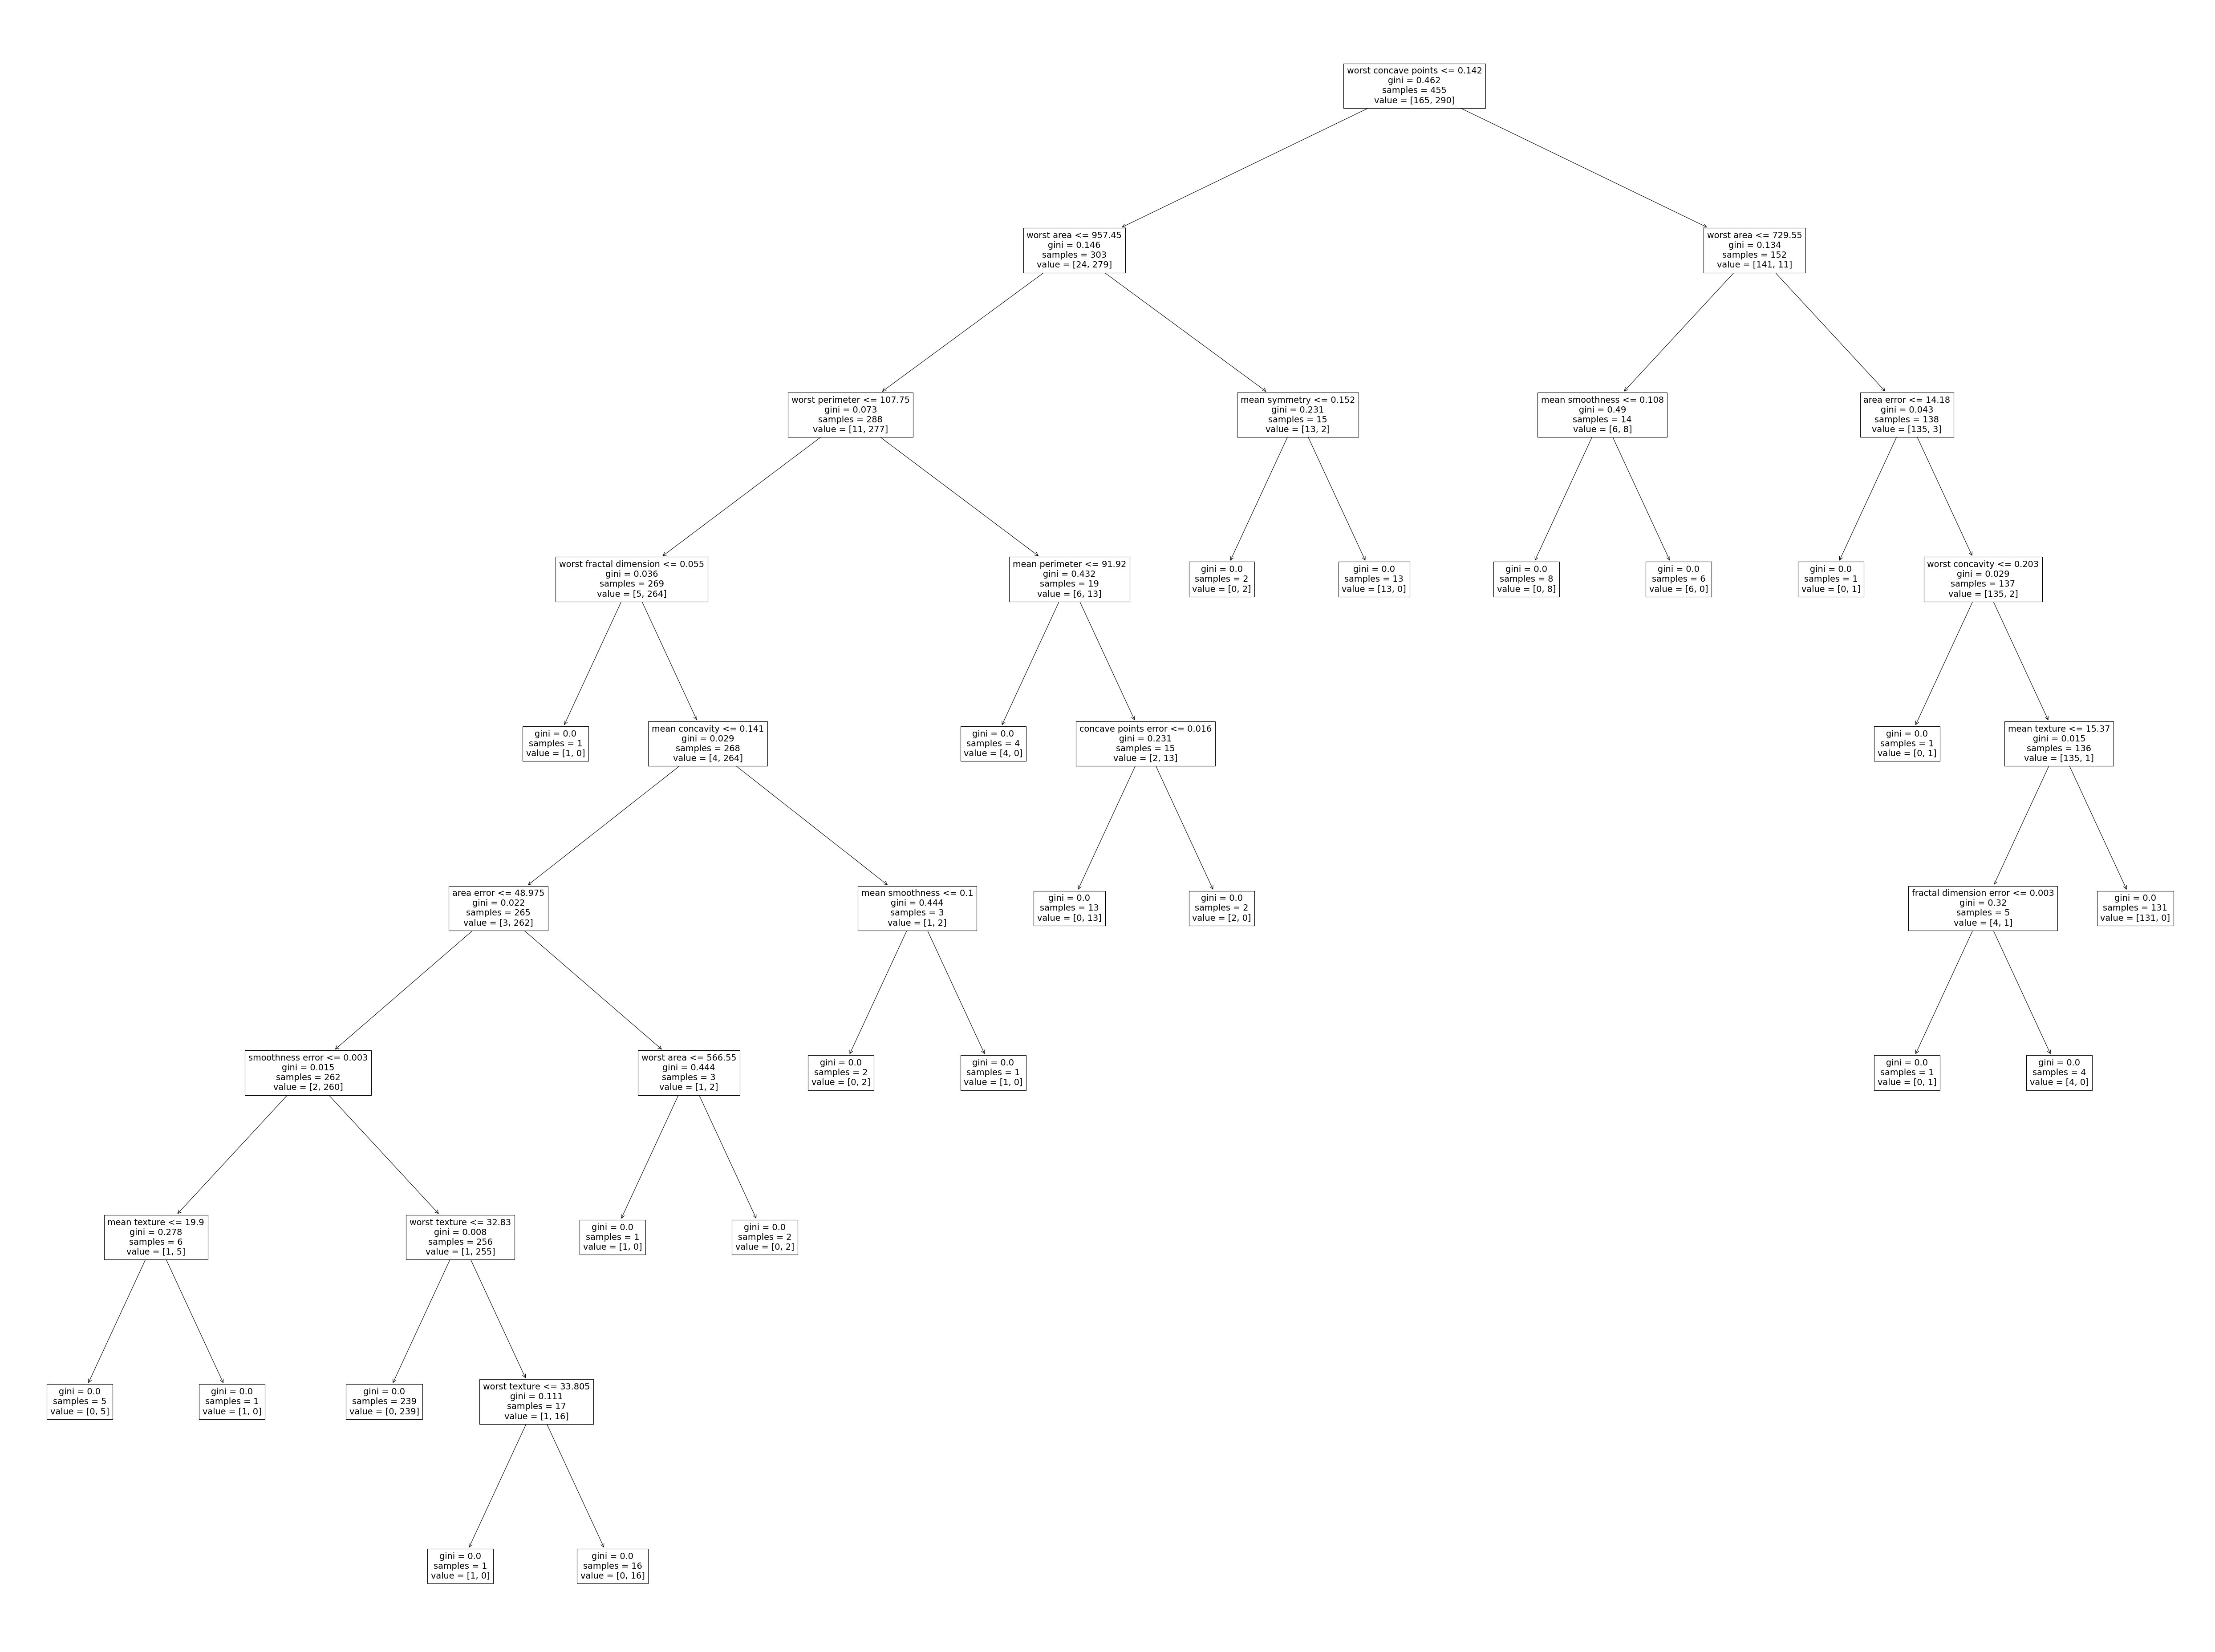

In [ ]:
# On commence par construire l'objet, arbre de décision classifieur
# Par défaut, le critère est l'indice de Gini qui est celui décrit dans le livre
# Nous voulons construire le gros arbre possible, donc nous ne mettons pas de contrainte sur la profondeur maximale de l'arbre
# Nous choisirons toujours random_state=0 pour avoir la même référence d'aléa
# Enfin, nous mettons un critère d'élagage nul (par défaut) pour avoir l'arbre maximale
clf = DecisionTreeClassifier(random_state=0)
# On entraîne notre arbre sur les données
clf.fit(X_train, y_train)

plt.figure(figsize=(80, 60), dpi=80)
tree.plot_tree(clf, feature_names = list(X.columns))

# On affiche certains critères de l'arbre pour se donner une idée de sa performance
print("Profondeur de l'abre : ",clf.get_depth())
print("Nombre de feuilles : ",clf.get_n_leaves())

# On utilisera l'accuracy sur le test_set comme critère de comparaison
print("L'accuracy du modèle sur le train set est : ", clf.score(X_train, y_train))
print("L'accuracy du modèle sur le test set est : ", clf.score(X_test, y_test))

L'arbre obtenu est imposant avec 22 feuilles pures. On obtient une accuracy sur le test set assez élevée de 91,2%. En revanche, l'accuracy sur le train set est de 100%, ce qui illustre bien le problème d'overfitting. Nous regardons si nous pouvons mieux faire en l'élagant.

## Sélection du meilleur modèle par l'hyper-paramètre $\alpha$ par K Fold Cross Validation

Cet arbre est intéressant mais peut être qu'il est trop grand et qu'il fait du sur-apprentissage. Nous allons donc choisir un hyper-paramètre : le critère de pénalisation $\alpha$. Il va venir penaliser un arbre grand, c'est-à-dire s'il a trop de feuilles. Donc une certaine node ne sera ajoutée que si elle permet de d'augmenter significativement le score.


Afin de choisir au mieux cet hyper-paramètre, nous allons utiliser la méthode du K Fold Cross Validation. Nous allons diviser notre jeu d'entraînement en K groupes, puis pour chaque $\alpha$ choisi, nous allons entraîner sur (K-1) groupes et le tester le groupe restant qui donnera un score. Toujours pour cet $\alpha$, nous allons répeter cette étape pour toutes les permutations des groupes. On fera ensuite la moyenne des scores obtenus.

On déterminera l'hyper-paramètre $\alpha$, en choisissant celui ayant la meilleure moyenne.

### Sélection et K-Fold Cross Validation

6


Text(0, 0.5, 'Score moyen')

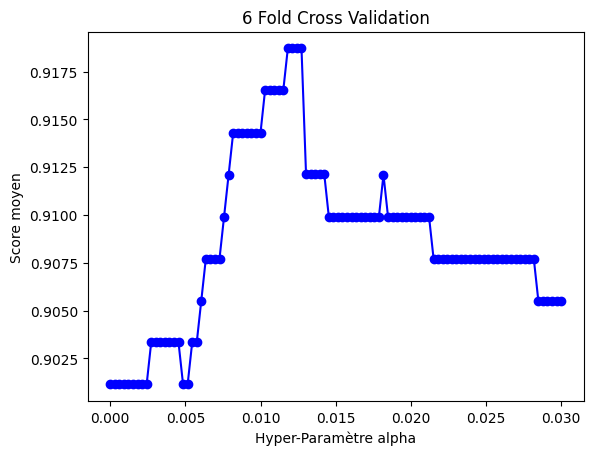

In [ ]:
from sklearn.model_selection import KFold

# Nous commencons par créer le data_set pour le K-Fold
# Comme nous avons déjà divisé notre jeu de données en train et test. L'indicage de train contient des sauts
# Il faut réindicer pour utiliser correctement la fonction K-Fold
X_trainbis = X_train.copy()
X_trainbis = X_trainbis.reset_index(drop=True) # pour avoir un jeu de données bien indéxé
y_trainbis = y_train.copy()
y_trainbis = y_trainbis.reset_index(drop=True) # pour avoir un jeu de données bien indéxé

# On créé une fonction qui renverra le score moyen sur une K-Fold Cross Validation en fonction de l'hyperparamètre alpha
def CV_penalisation(alphas,K):
  # Nous crééons une matrice de taille K x nombre de paramètres, pour y mettre un score plus tard
  acc = np.zeros((K,len(alphas)))

  # On créé a KFold object with k=K
  kf = KFold(n_splits=K, shuffle=True, random_state = 0)

  jj = 0
  # On itère sur les splits
  for train_index, test_index in kf.split(X_trainbis):

    # On récupère le train set et test set
    X_train1, X_test1 = X_trainbis.loc[train_index], X_trainbis.loc[test_index]
    y_train1, y_test1 = y_trainbis[train_index], y_trainbis[test_index]

    # On va désormais faire le test sur tous les hyperparamètres
    # On créé l'objet d'arbre de décision
    classifier_train = DecisionTreeClassifier(random_state = 0)
    L= np.zeros(len(alphas))

    ii = 0
    # On itère sur les paramètres
    for alpha in alphas:
      # On adapte notre arbre de décision en changeant uniquement l'hyper-paramètre
      classifier_train.set_params(ccp_alpha = alpha)
      # On entraîne notre arbre
      classifier_train.fit(X_train1,y_train1)

      # On calcule le score (donné dans l'objet)
      L[ii] = classifier_train.score(X_test1,y_test1)
      ii += 1

    acc[jj,] = L
    jj += 1

  print(jj)
  return np.mean(acc,axis=0)

n = 100   # Nombre d'hyper-paramètres testés
K = 6     # Nombre de Folds pour la Cross Validation choisie de manière arbitraire (entre 5 et 10 comme précisé dans le cours)
alphas_penalisation = np.linspace(0,0.03,n)   # On a testé au-dessus de 0.03 mais les valeurs intéressantes étaient en-dessous de 0.03
score_moyen_penalisation = CV_penalisation(alphas_penalisation, K)    # On utilise la fonction précédente
plt.plot(alphas_penalisation, score_moyen_penalisation , 'bo-')
plt.title(str(K) + " Fold Cross Validation")
plt.xlabel("Hyper-Paramètre alpha")
plt.ylabel("Score moyen")

Sur le graphique, on voit qu'il existe une valeur v de $\alpha$ maximisant le score. Donc sur l'intervalle $[0,v]$ le score est croissant avec la valeur de $\alpha$ et sur $[v,0.030]$ le score décroit avec $\alpha$. Cela a du sens. En effet, plus $\alpha$ est grand, plus on pénalise un arbre grand et donc moins on a de nodes. Le seuil v représente le juste milieu entre avoir un arbre trop long et un arbre peu précis. Avant v, on gagne en précision en diminuant le nombre de nodes car on évite le sur-apprentissage. Mais après v, plus on est grand plus on enlève des nodes et on risque le sous-apprentissage d'où le score qui faiblit.

On choisira graphiquement un alpha d'environ 0.012.

### Entraînement

Profondeur de l'abre :  3
Nombre de feuilles :  5


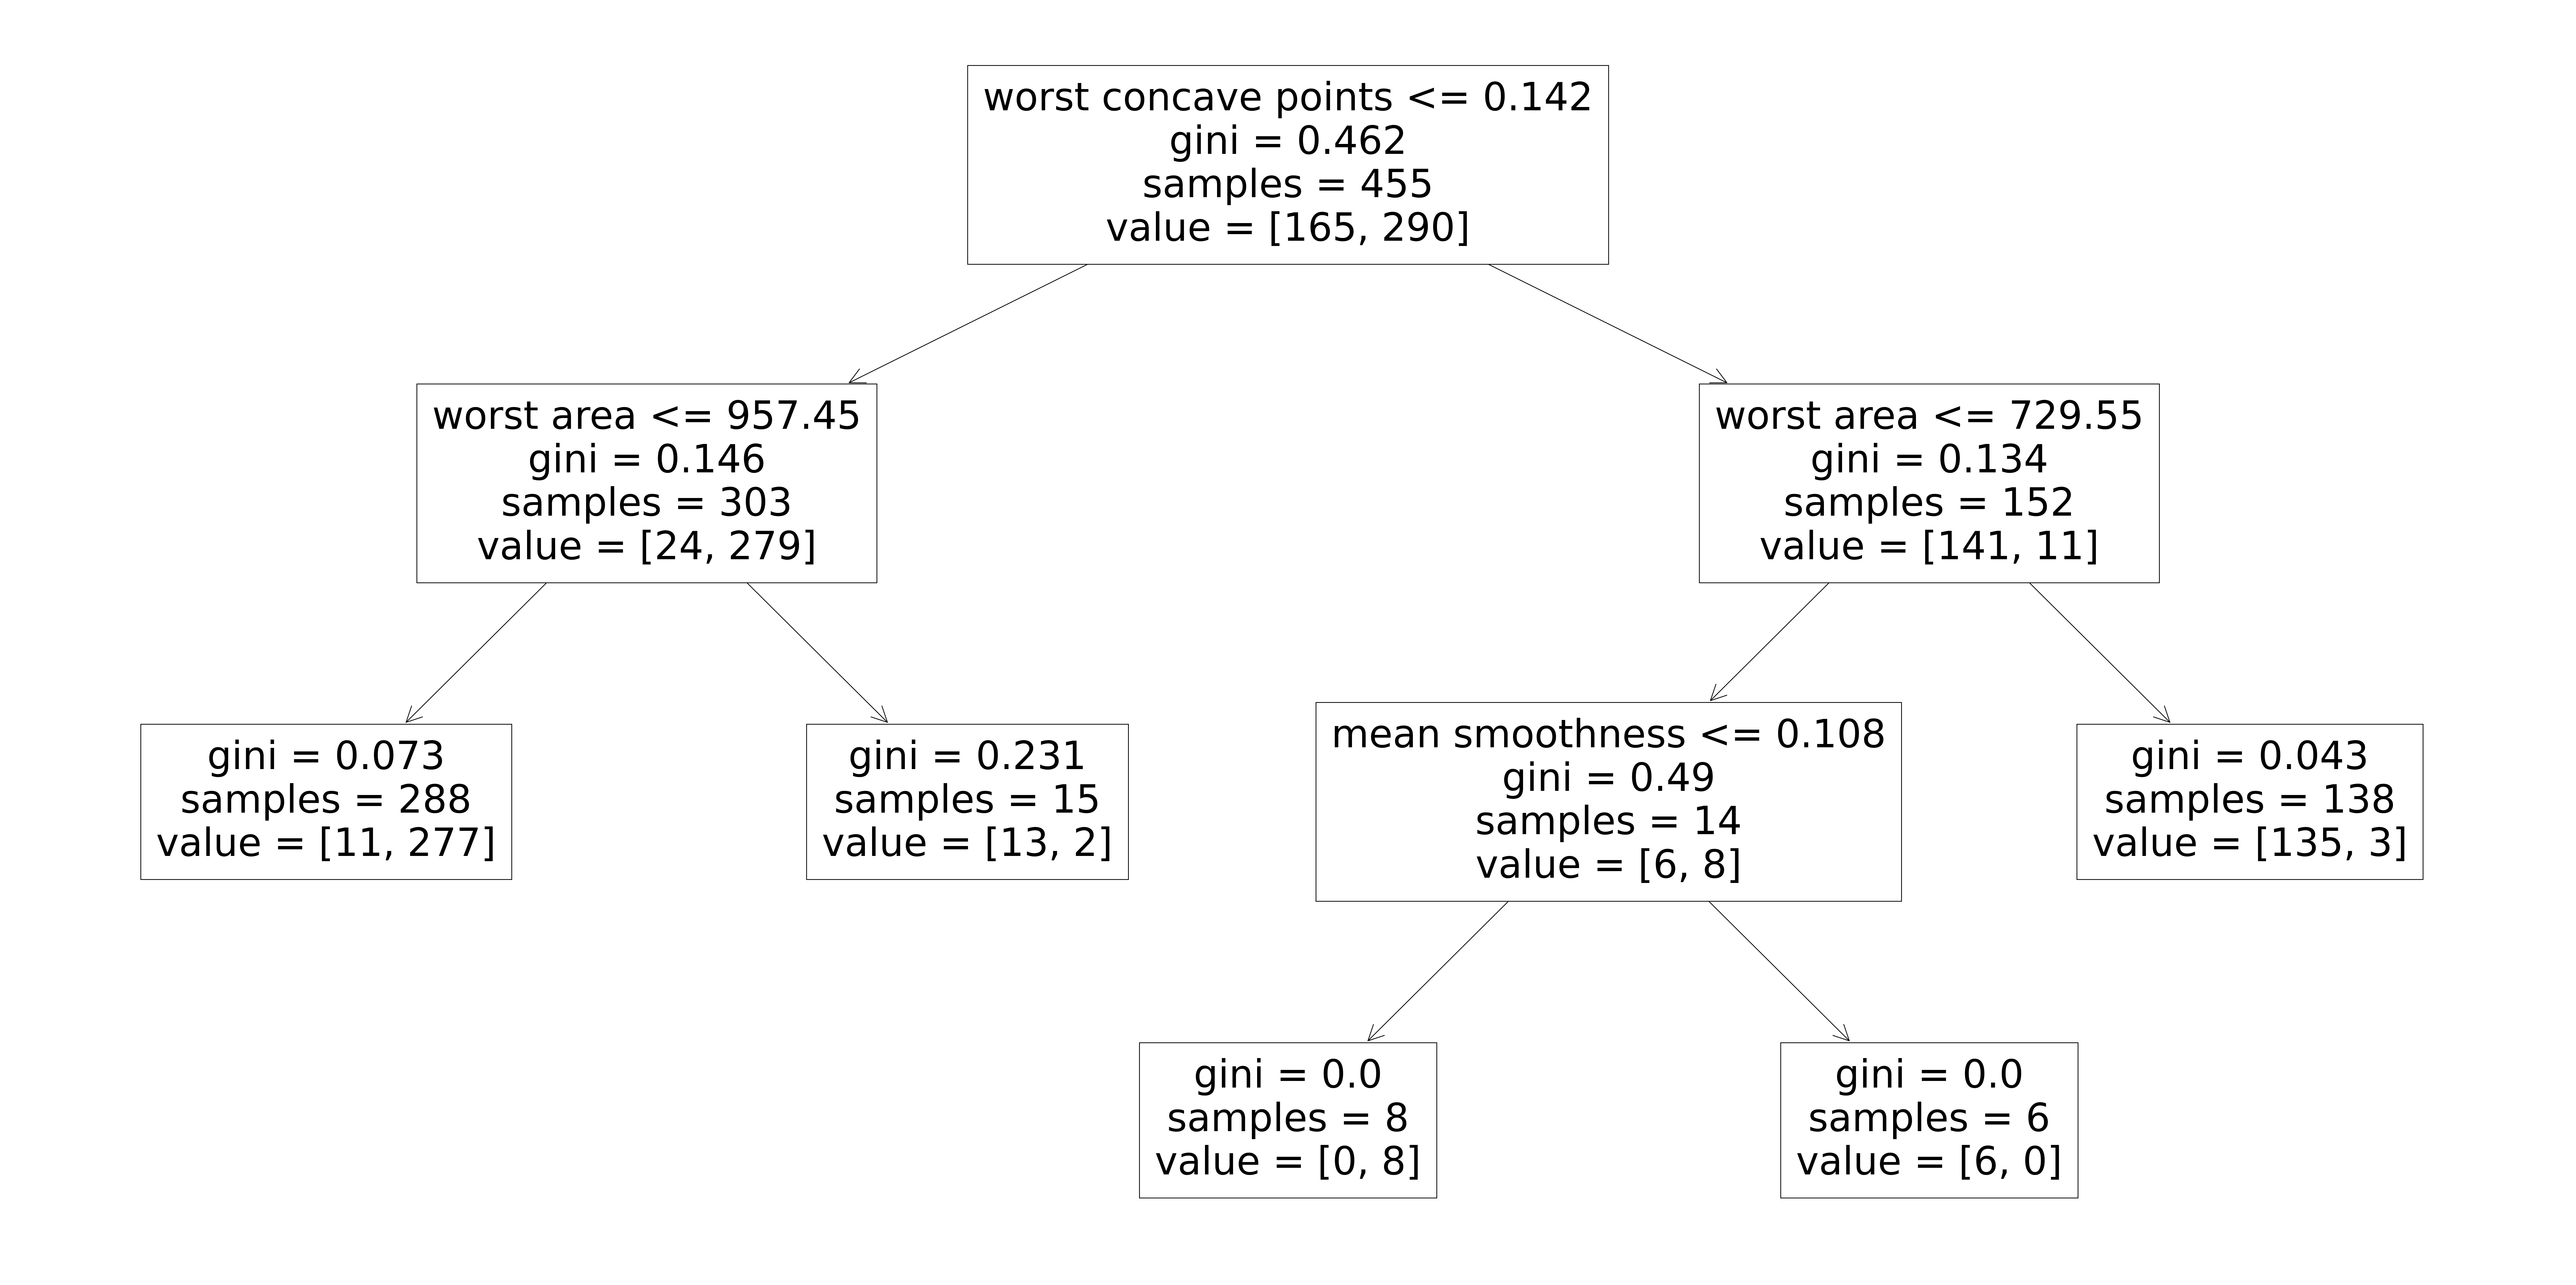

In [ ]:
# On recupère le meilleur alpha et on l'utilise pour construire notre arbre de décision
best_alpha_penalisation = alphas_penalisation[np.argmax(score_moyen_penalisation)]

# On créé un nouveau modèle avec ce meilleur alpha...
clf_penalisation = DecisionTreeClassifier(ccp_alpha = best_alpha_penalisation, random_state = 0)
# ... que l'on entraîne sur le train set
clf_penalisation.fit(X_train, y_train)

plt.figure(figsize=(60, 30), dpi=200)

tree.plot_tree(clf_penalisation, feature_names = list(X.columns))

# On affiche les mêmes critères de l'arbre pour comparer les performances
print("Profondeur de l'abre : ",clf_penalisation.get_depth())
print("Nombre de feuilles : ",clf_penalisation.get_n_leaves())

Notre modèle a été grandement simplifié, sa profondeur est de trois et ne comporte que 5 feuilles.
Nous pouvons désormais le tester sur notre échantillon test.

### Test

In [ ]:
print("L'accuracy du modèle sur le train set est : ",clf_penalisation.score(X_train,y_train))
print("L'accuracy du modèle sur le test set est : ",clf_penalisation.score(X_test,y_test))

L'accuracy du modèle sur le train set est :  0.9648351648351648
L'accuracy du modèle sur le test set est :  0.9736842105263158


Nous obtenons un score d'accuracy sur le test set de 97.3%. Il est supérieur à celui trouvé précedemment donc nous pouvons être satisfait.

# Bagging

La méthode de Bagging nécessite un hyper-paramètre déterminant le nombre d'arbres de la forêt décisionelle. Il va falloir décider de la meilleure valeur grâce au OOB score. Avant on utilisait Cross Validation car on n'avait qu'un arbre. Maintenant que l'on dispose d'une forêt on utilise le critère OOB score plutot que la méthode de Cross Validation car c'est plus rapide.

Taille de la foret :  100
Oob score du modèle associé :  0.9428571428571428
L'accuracy du modèle sur le train set est:  0.9912087912087912
L'accuracy du modèle sur le test set est:  0.956140350877193


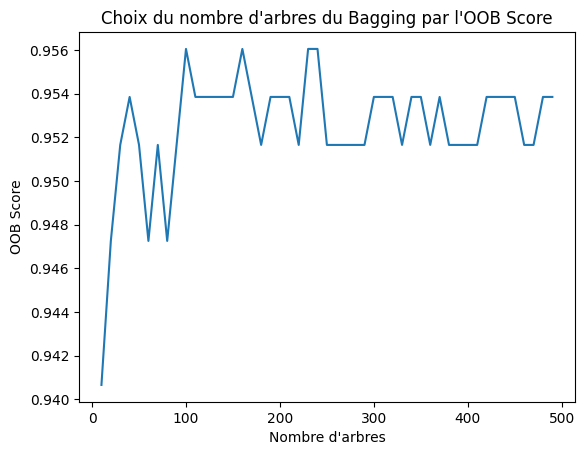

In [ ]:
from sklearn.ensemble import BaggingClassifier

# On créé une fonction qui renverra l'OOB score pour différentes tailles de forêt
def find_best_taille_bagging(vec):
  res = []
  # On itère sur les nombres d'arbres
  for k in vec :
    # On créé l'objet du modèle Bagging
    # n_estimator est le nombre d'arbres que l'on cherche à optimiser
    # On active oob_score pour pouvoir l'utiliser
    bag = BaggingClassifier(max_samples=2/3, n_estimators = k, random_state = 0, oob_score = True)
    # On a choisi arbitrairement la taille des sous-jeux de données
    # représente 2/3 de la taille du jeu d'entrainement initial

    # On entraîne le modèle sur nos données
    bag.fit(X_train, y_train)
    # On calcule l'OOB score
    res.append(bag.oob_score_)
  return res

# On teste les tailles de forêt entre 10 et 500 incrémenté par 10. Nous observerons par le graphique, il n'est pas nécessaire d'aller au-delà de 500.
vec_bagging = np.arange(10,500,10)
res_bagging = find_best_taille_bagging(vec_bagging)   # On teste pour toutes ces tailles
plt.plot(vec_bagging, res_bagging)
plt.xlabel("Nombre d'arbres")
plt.ylabel("OOB Score")
plt.title("Choix du nombre d'arbres du Bagging par l'OOB Score")

# On récupère la meilleure taille de forêts
best_taille_bagging = vec_bagging[np.argmax(res_bagging)]

# On créé un modèle avec cette valeur d'hyper-paramètre...
bag = BaggingClassifier(max_samples=.5, n_estimators = best_taille_bagging, random_state = 0, oob_score = True)
# ... que l'on entraîne sur nos données
bag.fit(X_train, y_train)

print("Taille de la foret : ", best_taille_bagging)
print("Oob score du modèle associé : ", bag.oob_score_)
print("L'accuracy du modèle sur le train set est: ", bag.score(X_train, y_train))
print("L'accuracy du modèle sur le test set est: ", bag.score(X_test, y_test))

L'accuracy sur le test set est a 95,6%. Un résultat satisfaisant bien qu'inférieur à celui obtenu avec un simple arbre de décision élagué.

# Random forest

De la même façon que pour bagging, il faut trouver la taille de forêt optimal et on utlisera le même critère de comparaison oob score.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


Text(0.5, 1.0, "Choix du nombre d'arbres de la forêt aléatoire par l'OOB Score")

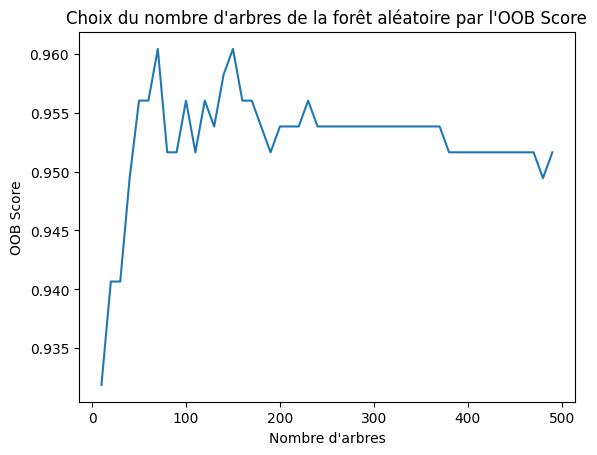

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# On créé une fonction qui renverra l'OOB score pour différentes tailles de forêt
def find_best_taille(vec):
  res= []
  # On itère sur les nombres d'arbres
  for k in vec :
    # On créé l'objet du modèle Random Forest
    # n_estimator est le nombre d'arbres que l'on cherche à optimiser
    # Par défaut max_features, qui correspond aux choix des colonnes, est la racinne du nombre de features, ce qui d'après le livre est optimal
    # Par défaut, le critère d'élagage est nulle
    # On active oob_score pour pouvoir l'utiliser
    foret = RandomForestClassifier(random_state=0, n_estimators=k, max_samples=.7, oob_score=True)
    # On a choisi arbitrairement la taille des sous-jeux de données
    # représente 70% de la taille du jeu d'entrainement initial

    # On entraîne le modèle sur nos données
    foret.fit(X_train, y_train)
    res.append(foret.oob_score_)
  return res

# On teste les tailles de forêt entre 10 et 500 incrémenté par 10. Nous observerons par le graphique, il n'est pas nécessaire d'aller au-delà de 500.
vec_foret = np.arange(10,500,10)
res_foret = find_best_taille(vec_foret)   # On teste sur les différentes tailles de forêt
plt.plot(vec_foret, res_foret)
plt.xlabel("Nombre d'arbres")
plt.ylabel("OOB Score")
plt.title("Choix du nombre d'arbres de la forêt aléatoire par l'OOB Score")

In [ ]:
best_taille_foret = vec_foret[np.argmax(res_foret)]     # On récupère la taille optimale
print("La taille de forêt utilisée : ", best_taille_foret)
# On créé le Random Forest de taille optimale...
foret_best = RandomForestClassifier(random_state=0, n_estimators=best_taille_foret, oob_score=True, max_samples=.7)
#... que l'on entraîne sur nos données
foret_best.fit(X_train, y_train)
print("Le oob score associé au modèle : ", foret_best.oob_score_)
print("L'accuracy du modèle sur le train set est : ", foret_best.score(X_train, y_train))
print("L'accuracy du modèle sur le test set est : ", foret_best.score(X_test, y_test))

La taille de forêt utilisée :  70
Le oob score associé au modèle :  0.9604395604395605
L'accuracy du modèle sur le train set est :  1.0
L'accuracy du modèle sur le test set est :  0.956140350877193


L'accuracy du modèle est à 95,6% exactement la même qu'avec la méthode bagging et donc toujours inférieure à l'accuracy du modèle d'arbre élagué.

S'agissant d'une classification binaire, nous pouvons regarder les matrices de confusions des différents modèles.

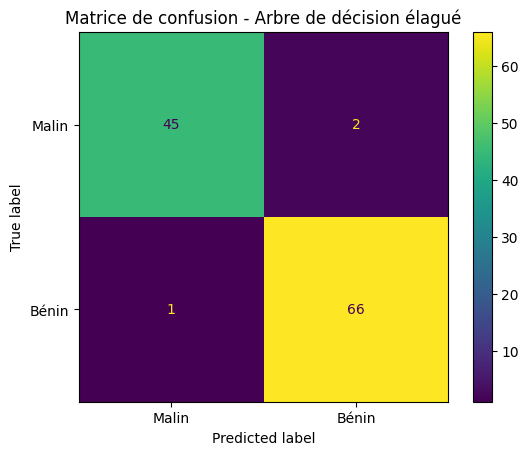

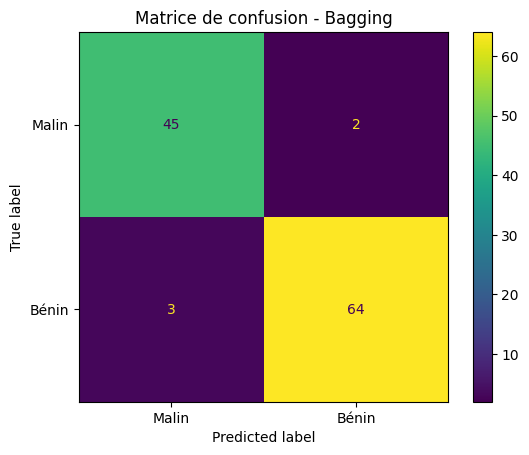

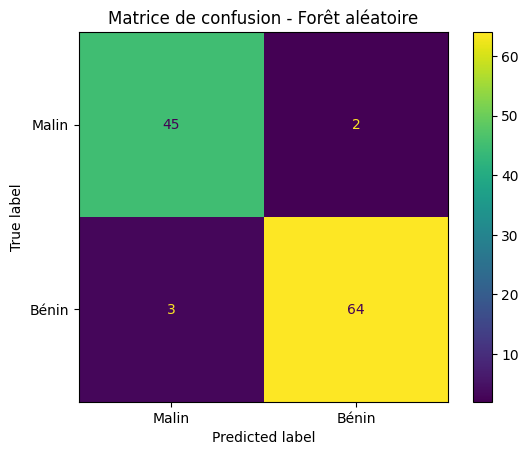

In [ ]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

# On utilise l'objet confusion_matrix pour créer les matrices de diffusions selon les trois modèles
conf_clf = confusion_matrix(y_test, clf_penalisation.predict(X_test))
conf_Bagging = confusion_matrix(y_test, bag.predict(X_test))
conf_RF = confusion_matrix(y_test, foret_best.predict(X_test))

# On utilise l'objet ConfusionMatrixDisplay pour l'afficher
conf_clfD = ConfusionMatrixDisplay(conf_clf, display_labels=['Malin','Bénin'])
conf_clfD.plot()
plt.title("Matrice de confusion - Arbre de décision élagué")
plt.show()

# De même pour bagging
conf_BaggingD = ConfusionMatrixDisplay(conf_Bagging, display_labels=['Malin','Bénin'])
conf_BaggingD.plot()
plt.title("Matrice de confusion - Bagging")
plt.show()

# De même pour Random Forest
conf_RFd = ConfusionMatrixDisplay(conf_RF, display_labels=['Malin','Bénin'])
conf_RFd.plot()
plt.title("Matrice de confusion - Forêt aléatoire")
plt.show()



Les matrices de confusion du Bagging et de la forêt aléatoire sont les mêmes. Cela confirme d'ailleurs le même score. L'arbre de décision classique est également meilleur.